In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("../기상청공모전/data/ulsan_drag&answer.csv")

In [3]:
a1 = a.iloc[:,[0,2,3,-1]]

In [4]:
a1

,num,latitude,longitude,anchor_drag
0,1,35.433233,129.458967,0
1,1,35.433233,129.458983,0
2,1,35.433250,129.459000,0
3,1,35.433250,129.459000,0
4,1,35.433267,129.459017,0
...,...,...,...,...
218607,163,35.443755,129.414917,1
218608,163,35.443685,129.414905,1
218609,163,35.443608,129.414883,1
218610,163,35.443515,129.414872,1


In [5]:
_order = ["anchor_drag", "num", "latitude", "longitude"]

In [6]:
a1 = a1.reindex(columns = _order)

In [7]:
a1

,anchor_drag,num,latitude,longitude
0,0,1,35.433233,129.458967
1,0,1,35.433233,129.458983
2,0,1,35.433250,129.459000
3,0,1,35.433250,129.459000
4,0,1,35.433267,129.459017
...,...,...,...,...
218607,1,163,35.443755,129.414917
218608,1,163,35.443685,129.414905
218609,1,163,35.443608,129.414883
218610,1,163,35.443515,129.414872


In [8]:
for i in range(1,len(a1)):
    a1.loc[i,'d_lati'] = a1.loc[i,'latitude'] - a1.loc[i-1,'latitude']
    a1.loc[i,'d_long'] = a1.loc[i,'longitude'] - a1.loc[i-1,'longitude']

In [9]:
a1

,anchor_drag,num,latitude,longitude,d_lati,d_long
0,0,1,35.433233,129.458967,NaN,NaN
1,0,1,35.433233,129.458983,0.000000,0.000016
2,0,1,35.433250,129.459000,0.000017,0.000017
3,0,1,35.433250,129.459000,0.000000,0.000000
4,0,1,35.433267,129.459017,0.000017,0.000017
...,...,...,...,...,...,...
218607,1,163,35.443755,129.414917,-0.000062,-0.000008
218608,1,163,35.443685,129.414905,-0.000070,-0.000012
218609,1,163,35.443608,129.414883,-0.000077,-0.000022
218610,1,163,35.443515,129.414872,-0.000093,-0.000011


In [10]:
for i in range(1,len(a1)):
    a1.loc[i,'d_d_lati'] = a1.loc[i,'d_lati'] - a1.loc[i-1,'d_lati']
    a1.loc[i,'d_d_long'] = a1.loc[i,'d_lati'] - a1.loc[i-1,'d_lati']

In [11]:
a1

,anchor_drag,num,latitude,longitude,d_lati,d_long,d_d_lati,d_d_long
0,0,1,35.433233,129.458967,NaN,NaN,NaN,NaN
1,0,1,35.433233,129.458983,0.000000,0.000016,NaN,NaN
2,0,1,35.433250,129.459000,0.000017,0.000017,0.000017,0.000017
3,0,1,35.433250,129.459000,0.000000,0.000000,-0.000017,-0.000017
4,0,1,35.433267,129.459017,0.000017,0.000017,0.000017,0.000017
...,...,...,...,...,...,...,...,...
218607,1,163,35.443755,129.414917,-0.000062,-0.000008,-0.000009,-0.000009
218608,1,163,35.443685,129.414905,-0.000070,-0.000012,-0.000008,-0.000008
218609,1,163,35.443608,129.414883,-0.000077,-0.000022,-0.000007,-0.000007
218610,1,163,35.443515,129.414872,-0.000093,-0.000011,-0.000016,-0.000016


In [12]:
ship_num = a1.iloc[:,1].unique()

In [13]:
_drop = []
for i in ship_num:
    k = a1[a1["num"] == i].index[0]
    _drop.append(k)
    k += 1
    _drop.append(k)

In [14]:
_drop

[0,
 1,
 592,
 593,
 968,
 969,
 6144,
 6145,
 6307,
 6308,
 6900,
 6901,
 7258,
 7259,
 8309,
 8310,
 8576,
 8577,
 9122,
 9123,
 10086,
 10087,
 19950,
 19951,
 20831,
 20832,
 22126,
 22127,
 22532,
 22533,
 23072,
 23073,
 23799,
 23800,
 24327,
 24328,
 24734,
 24735,
 24975,
 24976,
 27122,
 27123,
 27550,
 27551,
 27752,
 27753,
 29423,
 29424,
 30105,
 30106,
 30532,
 30533,
 30928,
 30929,
 31337,
 31338,
 31748,
 31749,
 32638,
 32639,
 32958,
 32959,
 34048,
 34049,
 35275,
 35276,
 36262,
 36263,
 37051,
 37052,
 37816,
 37817,
 39159,
 39160,
 39551,
 39552,
 64131,
 64132,
 65515,
 65516,
 67411,
 67412,
 68391,
 68392,
 68872,
 68873,
 69821,
 69822,
 70402,
 70403,
 71945,
 71946,
 72438,
 72439,
 73855,
 73856,
 74047,
 74048,
 74941,
 74942,
 76133,
 76134,
 90543,
 90544,
 91114,
 91115,
 93148,
 93149,
 93598,
 93599,
 94389,
 94390,
 95575,
 95576,
 95791,
 95792,
 96003,
 96004,
 96603,
 96604,
 97458,
 97459,
 98524,
 98525,
 98758,
 98759,
 99289,
 99290,
 99561

In [15]:
len(_drop)

326

In [16]:
a1 = a1[~a1.index.isin(_drop)]

In [17]:
a1

,anchor_drag,num,latitude,longitude,d_lati,d_long,d_d_lati,d_d_long
2,0,1,35.433250,129.459000,0.000017,0.000017,1.700000e-05,1.700000e-05
3,0,1,35.433250,129.459000,0.000000,0.000000,-1.700000e-05,-1.700000e-05
4,0,1,35.433267,129.459017,0.000017,0.000017,1.700000e-05,1.700000e-05
5,0,1,35.433283,129.459033,0.000016,0.000016,-1.000000e-06,-1.000000e-06
6,0,1,35.433283,129.459033,0.000000,0.000000,-1.600000e-05,-1.600000e-05
...,...,...,...,...,...,...,...,...
218607,1,163,35.443755,129.414917,-0.000062,-0.000008,-9.000000e-06,-9.000000e-06
218608,1,163,35.443685,129.414905,-0.000070,-0.000012,-8.000000e-06,-8.000000e-06
218609,1,163,35.443608,129.414883,-0.000077,-0.000022,-7.000000e-06,-7.000000e-06
218610,1,163,35.443515,129.414872,-0.000093,-0.000011,-1.600000e-05,-1.600000e-05


In [18]:
218612 - 218286

326

In [19]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

X = a1.iloc[:, 1:]  # 두번째 열부터 마지막 열까지 입력값
y = a1.iloc[:, 0]  # 첫번째 열이 정답열


# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 학습
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_rounds = 100  # 반복 횟수 설정

model = xgb.train(params, dtrain, num_rounds)

# 테스트 데이터 예측
y_pred = model.predict(dtest)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_binary)
print("정확도:", accuracy)

정확도: 0.9912043611709194


In [20]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_binary))

0.8542141230068336


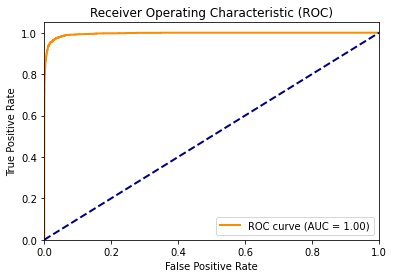

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# XGBoost 모델 예측 확률
y_pred_proba = model.predict(dtest)

# 양성 클래스의 예측 확률 추출
pos_proba = y_pred_proba

# 실제값과 비교할 양성 클래스의 실제 레이블
y_true = np.array(y_test)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_true, pos_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()